# **Classify Images (CIFAR-10) using CNN**

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
- Airplanes
- Cars
- Birds
- Cats
- Deer
- Dogs
- Frogs
- Horses
- Ships
- Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR). CIFAR-10 is widely used for machine learning and computer vision applications.The dataset consists of 60,000 32x32 color images and 6,000 images of each class.Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Dataset
from keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# **Data Visualization**

[9]


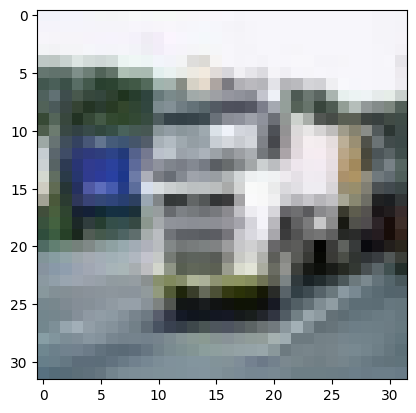

In [8]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

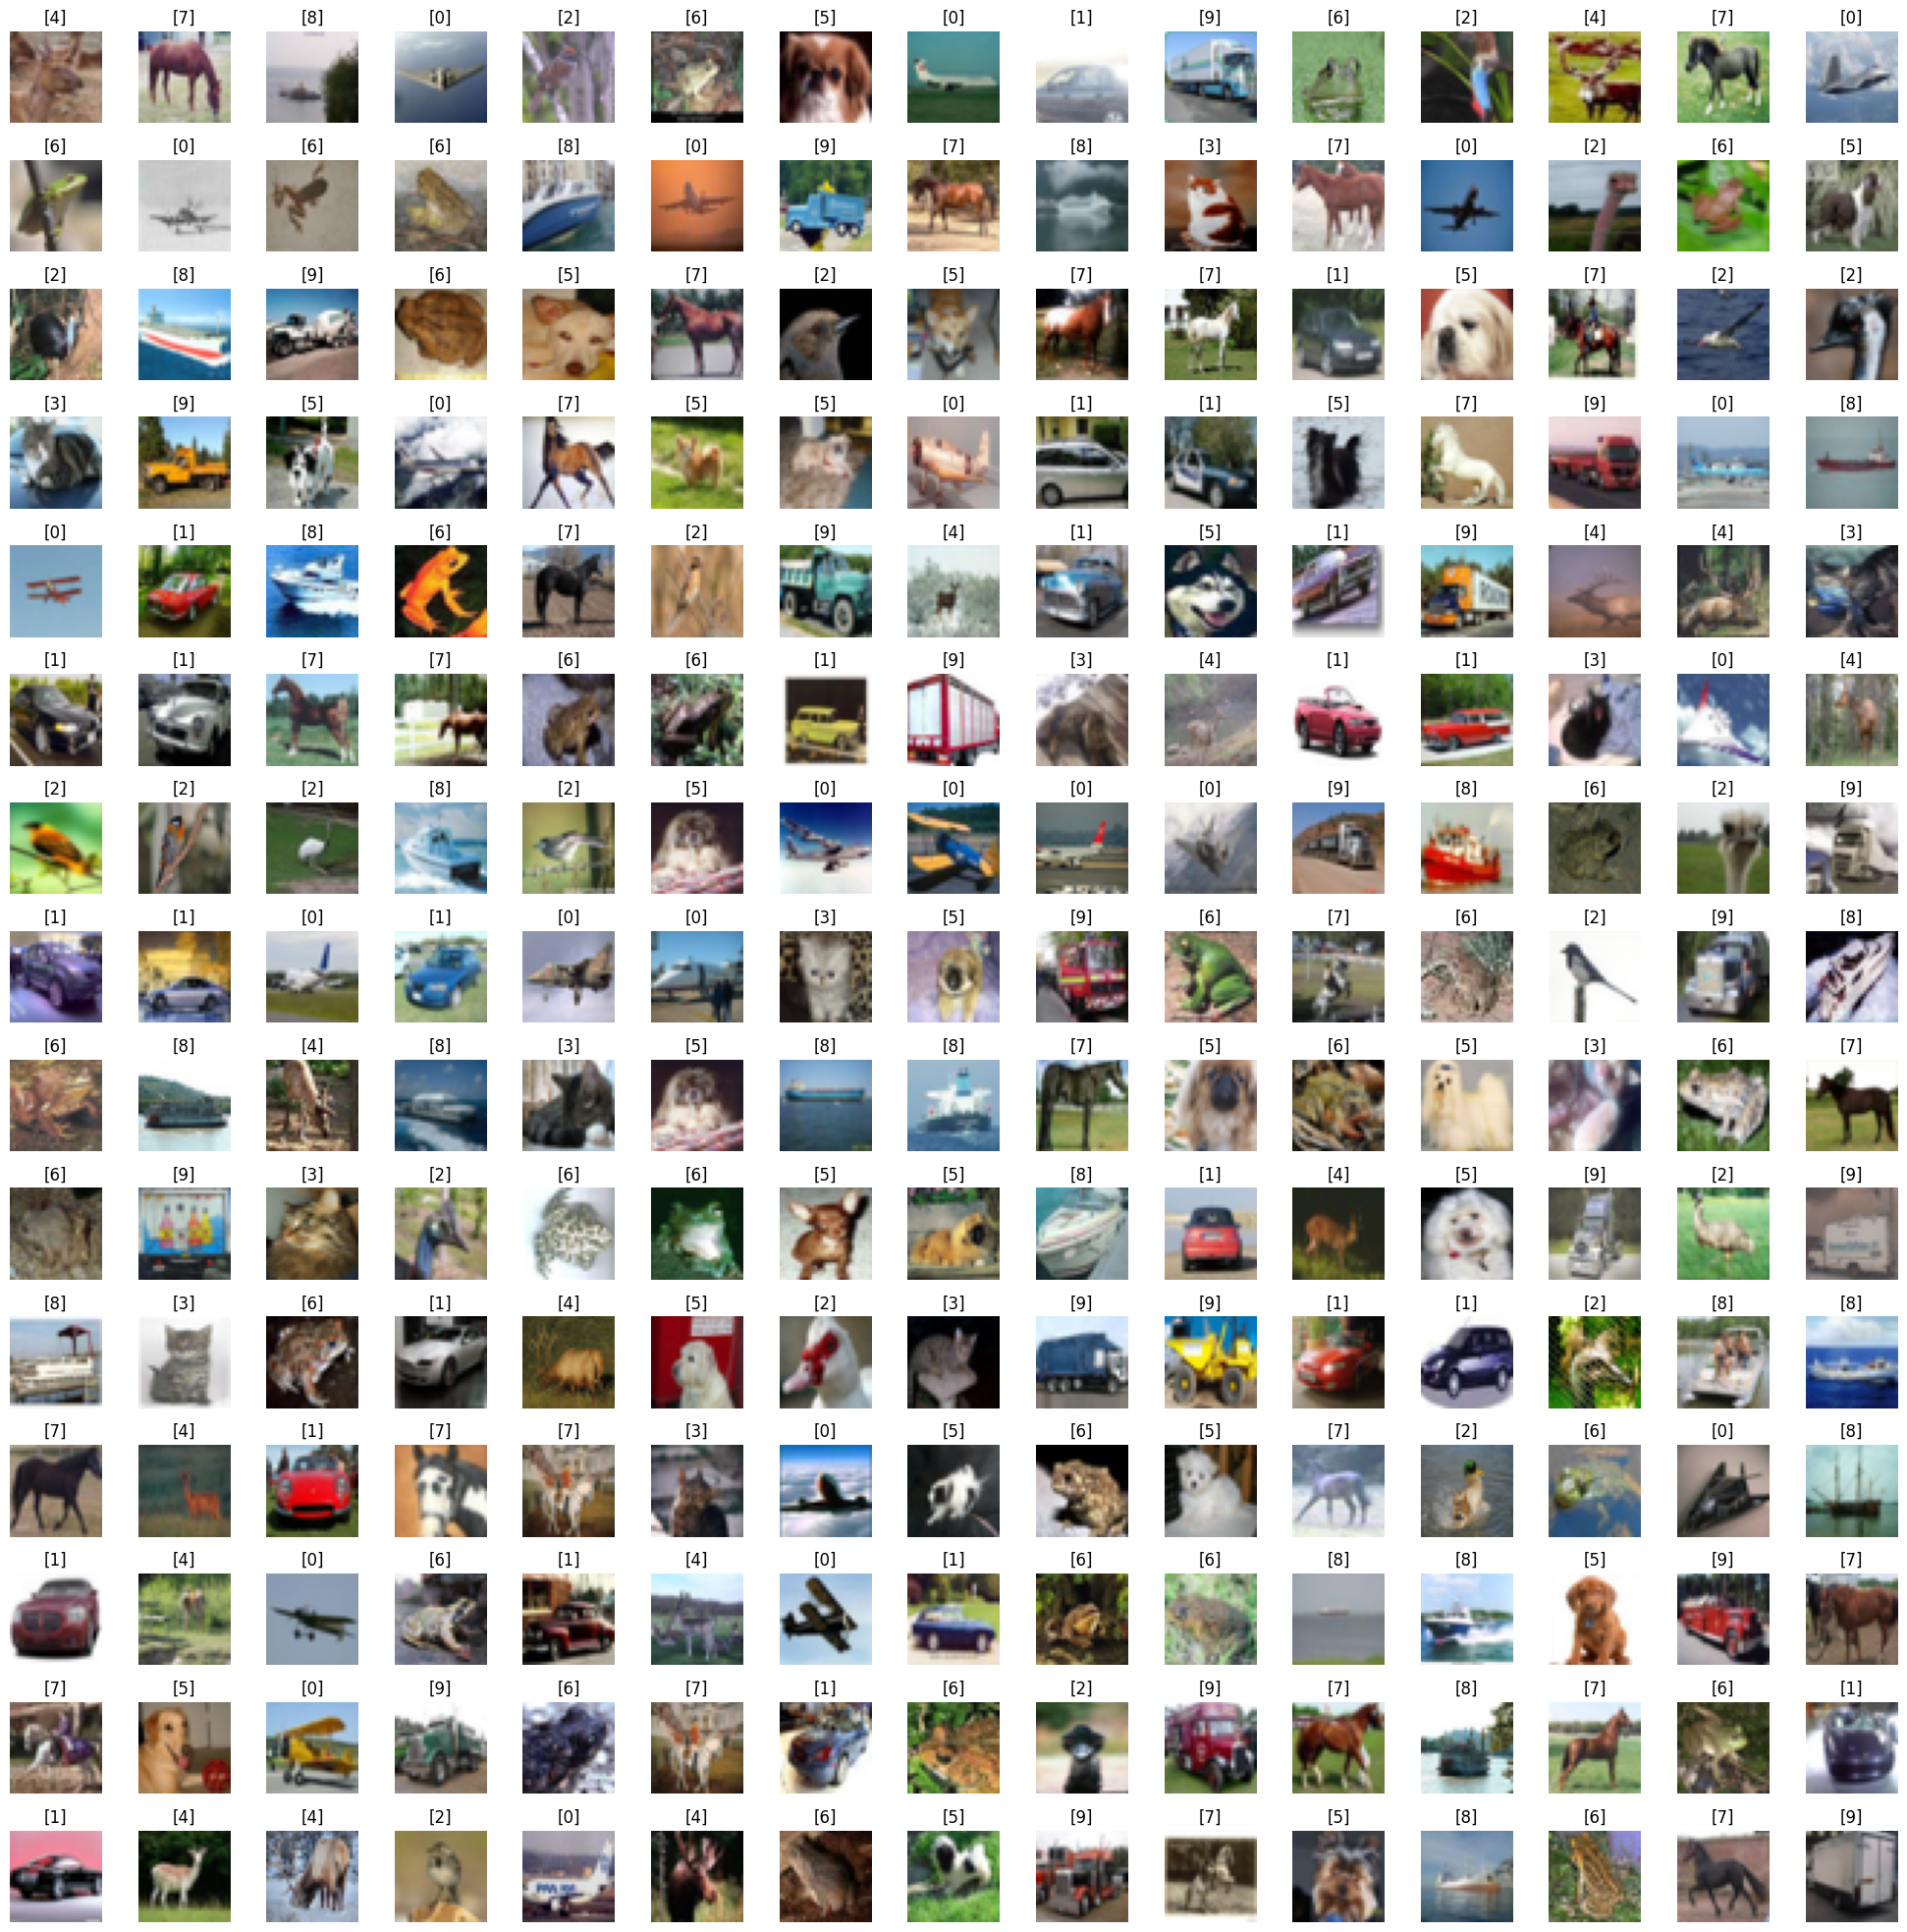

In [9]:
grid_width=15
grid_length=15

fig,axes = plt.subplots(grid_length,grid_width, figsize =(25,25))
axes=axes.ravel() #Flatten the Matrix

n_training=len(X_train)

for i in np.arange(0,grid_length * grid_width):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# **Data Preparation**

In [10]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [11]:
number_category=10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
#Convert y_train values to categorical values
y_train = keras.utils.to_categorical(y_train,number_category)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test,number_category)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
#Normalize the values
X_train=X_train/255
X_test=X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape=X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

# **Model Training**

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=1024, activation='relu'))

#Softmax is ideal in this case since output has to be 0/1
#Output Layer Units - 10 classes
cnn_model.add(Dense(units=10, activation = 'softmax'))

In [24]:
cnn_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs=20, shuffle = True)

Epoch 1/20
1563/1563 [==============================] - 545s 348ms/step - loss: 1.6388 - accuracy: 0.4047
Epoch 2/20
1563/1563 [==============================] - 542s 347ms/step - loss: 1.1316 - accuracy: 0.6061
Epoch 3/20
1563/1563 [==============================] - 541s 346ms/step - loss: 0.9466 - accuracy: 0.6764
Epoch 4/20
1563/1563 [==============================] - 536s 343ms/step - loss: 0.8647 - accuracy: 0.7099
Epoch 5/20
1563/1563 [==============================] - 538s 344ms/step - loss: 0.8288 - accuracy: 0.7239
Epoch 6/20
1563/1563 [==============================] - 540s 346ms/step - loss: 0.7885 - accuracy: 0.7413
Epoch 7/20
1563/1563 [==============================] - 539s 345ms/step - loss: 0.7672 - accuracy: 0.7489
Epoch 8/20
1563/1563 [==============================] - 539s 345ms/step - loss: 0.7534 - accuracy: 0.7538
Epoch 9/20
1563/1563 [==============================] - 537s 343ms/step - loss: 0.7426 - accuracy: 0.7615
Epoch 10/20
1563/1563 [=======================

# **Model Evaluation**

In [26]:
eval = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(eval[1]))

313/313 [==============================] - 30s 94ms/step - loss: 0.8192 - accuracy: 0.7646
Test Accuracy: 0.7645999789237976


In [27]:
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)
predicted_classes

313/313 [==============================] - 28s 88ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test=y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

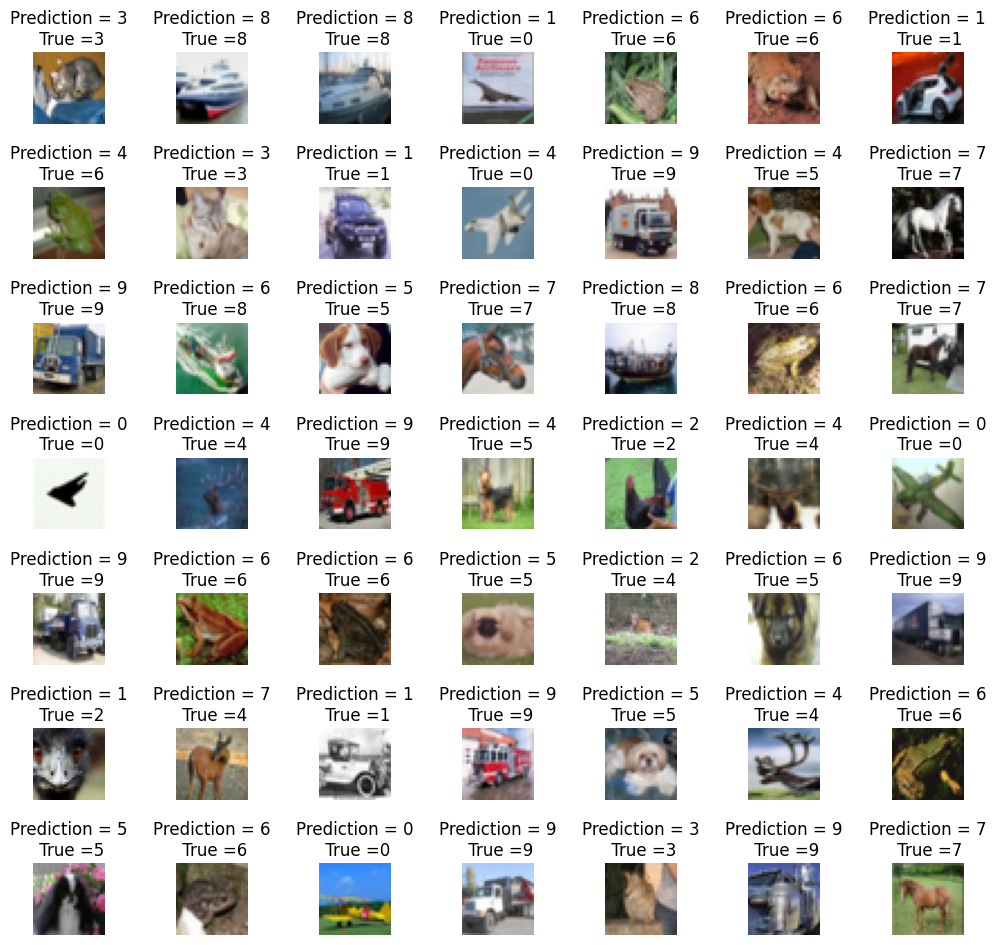

In [31]:
length = 7
width = 7
fig, axes = plt.subplots(length, width, figsize =(12,12))
axes=axes.ravel()

for i in np.arange(0,length*width):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True ={}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<Axes: >

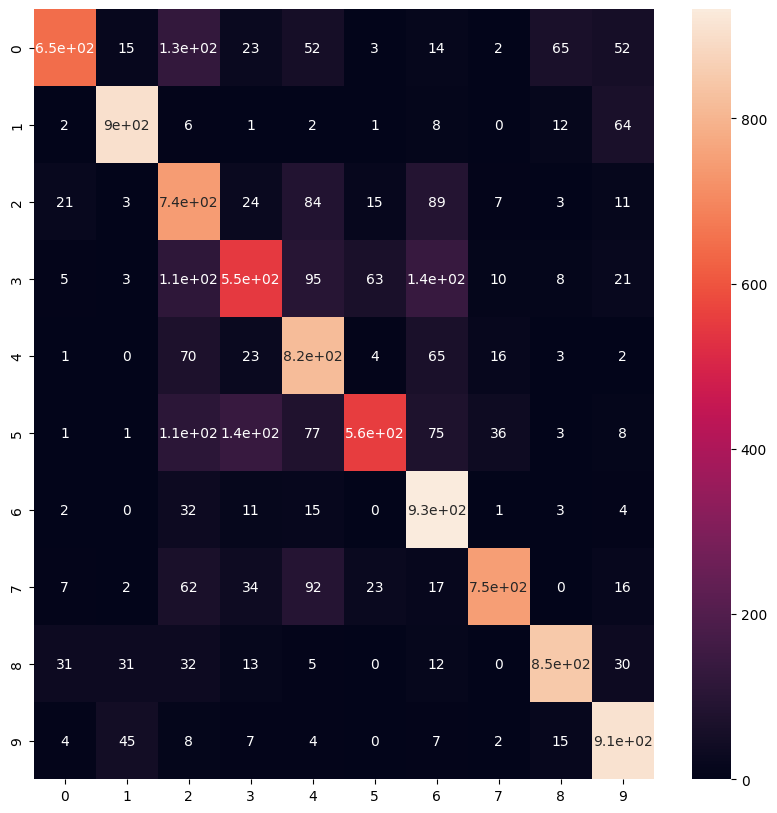

In [32]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predicted_classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

# **Saving the Model**

In [33]:
import os
directory=os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path=os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Data Augmentation for CIFAR-10 Dataset**

In [35]:
import keras
from keras.datasets import cifar10

(x_train,y_train),(X_test,y_test)=cifar10.load_data()

In [36]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
n=8
X_train_sample = X_train [:n]

In [39]:
X_train_sample.shape

(8, 32, 32, 3)

In [60]:
from keras.preprocessing.image import ImageDataGenerator
#dataget_train = ImageDataGenerator(rotation_range=90)

dataget_train = ImageDataGenerator(vertical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)

dataget_train.fit(X_train_sample)

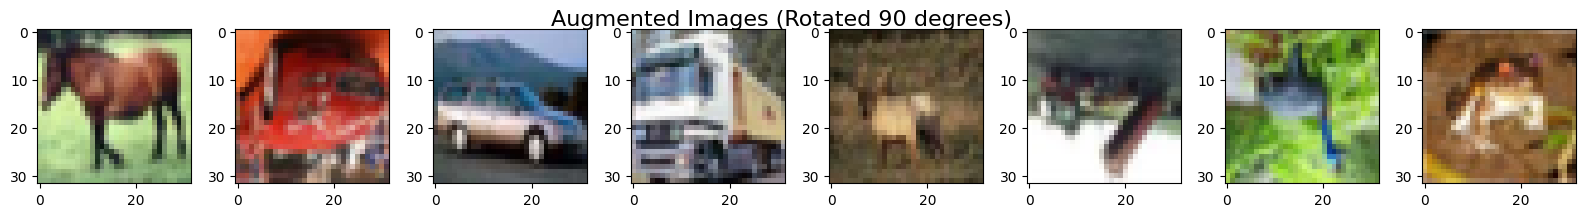

In [61]:
fig = plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(x_batch[i])

    fig.suptitle('Augmented Images (Rotated 90 degrees)', fontsize=16)
    plt.show()
    break;  # Stop after displaying one batch of augmented images